In [3]:
import pandas as pd

In [4]:
csvFilePath = "./src/data/usage.csv"

In [5]:
kwhDf = pd.read_csv(csvFilePath, parse_dates=['Date'])
kwhDf

,Date,kWh
0,2020-12-20,197.000000
1,2021-01-21,185.000000
2,2021-02-22,178.000000
3,2021-03-23,153.000000
4,2021-04-21,174.000000
5,2021-05-20,179.000000
6,2021-06-21,640.000000
7,2021-07-21,558.000000
8,2021-08-19,538.000000
9,2021-09-20,389.000000


In [6]:
kwhDf.dtypes

Date    datetime64[ns]
kWh            float64
dtype: object

<Axes: xlabel='Date'>

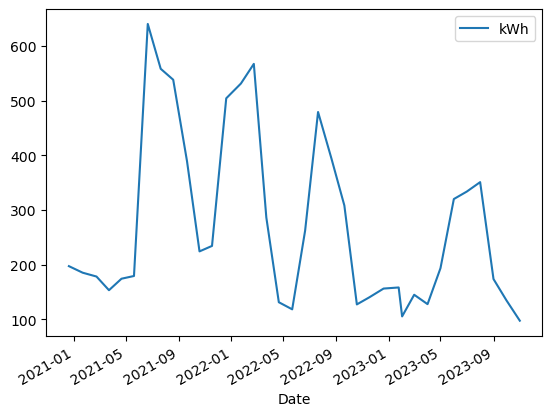

In [7]:
kwhDf.plot(kind='line', x='Date', y='kWh')

In [8]:
kwhDf.describe()

,Date,kWh
count,36,36.000000
mean,2022-05-31 07:20:00,271.927844
min,2020-12-20 00:00:00,97.212000
25%,2021-09-12 00:00:00,150.917250
50%,2022-06-06 00:00:00,195.147500
75%,2023-02-08 00:00:00,360.264500
max,2023-11-01 00:00:00,640.000000
std,NaN,158.403816


In [9]:
kwhInfoDf = pd.DataFrame(columns=['Metric', 'Value','Date', 'Annotation'])

In [10]:
kwhInfoDf

,Metric,Value,Date,Annotation


In [11]:


# Calculate mean, max, and min kWh
mean_kWh = kwhDf['kWh'].mean()
max_kWh = kwhDf['kWh'].max()
min_kWh = kwhDf['kWh'].min()

# Create a new row for the summary information
summary_row = pd.DataFrame({
    'Statistic': ['Mean', 'Max', 'Min'],
    'kWh': [mean_kWh, max_kWh, min_kWh],
    'Date': [kwhDf['Date'].mean(), kwhDf.loc[kwhDf['kWh'].idxmax(), 'Date'], kwhDf.loc[kwhDf['kWh'].idxmin(), 'Date']]
})

summary_row


,Statistic,kWh,Date
0,Mean,271.927844,2022-05-31 07:20:00
1,Max,640.000000,2021-06-21 00:00:00
2,Min,97.212000,2023-11-01 00:00:00


In [12]:

# Filter rows for the years 2021 and 2023
kWh_2021 = kwhDf[kwhDf['Date'].dt.year == 2021]['kWh'].sum()
kWh_2023 = kwhDf[kwhDf['Date'].dt.year == 2023]['kWh'].sum()

# Calculate percent decrease
percent_decrease = ((kWh_2021 - kWh_2023) / kWh_2021) * 100

# Display the result
print(f'Percent Decrease between 2021 and 2023: {percent_decrease:.2f}%')


Percent Decrease between 2021 and 2023: 45.97%


In [13]:
kWh_2022 = kwhDf[kwhDf['Date'].dt.year == 2022]['kWh'].sum()

In [14]:
condoSqFt = 816

In [15]:
eui_2021 = kWh_2021/condoSqFt
eui_2021

4.848039215686274

In [16]:
eui_2022 = kWh_2022/condoSqFt
eui_2022

4.2879901960784315

In [17]:
eui_2023 = kWh_2023/condoSqFt
eui_2023

2.6193656470588236

In [18]:
import os
from supabase import create_client, Client



In [19]:
from dotenv import load_dotenv

In [20]:
load_dotenv()

True

In [21]:
url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)

In [22]:
print(url)

https://pfevxlfpwfdhmnfhluzs.supabase.co


In [23]:

response = supabase.table('monthlyUseXCel').select("*").execute()
response

2023-12-13 17:19:08,712:INFO - HTTP Request: GET https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/monthlyUseXCel?select=%2A "HTTP/1.1 200 OK"


APIResponse[~_ReturnT](data=[{'date': '2020-12-20', 'kWh': 197, 'annotation': None}, {'date': '2021-01-21', 'kWh': 185, 'annotation': None}, {'date': '2021-02-22', 'kWh': 178, 'annotation': None}, {'date': '2021-03-23', 'kWh': 153, 'annotation': None}, {'date': '2021-04-21', 'kWh': 174, 'annotation': None}, {'date': '2021-05-20', 'kWh': 179, 'annotation': None}, {'date': '2021-06-21', 'kWh': 640, 'annotation': None}, {'date': '2021-07-21', 'kWh': 558, 'annotation': None}, {'date': '2021-08-19', 'kWh': 538, 'annotation': None}, {'date': '2021-09-20', 'kWh': 389, 'annotation': None}, {'date': '2021-10-19', 'kWh': 224, 'annotation': None}, {'date': '2021-11-17', 'kWh': 234, 'annotation': None}, {'date': '2021-12-20', 'kWh': 504, 'annotation': None}, {'date': '2022-01-23', 'kWh': 531, 'annotation': None}, {'date': '2022-02-22', 'kWh': 567, 'annotation': None}, {'date': '2022-03-23', 'kWh': 286, 'annotation': None}, {'date': '2022-04-21', 'kWh': 131, 'annotation': None}, {'date': '2022-05-2

In [24]:

date, kWh = supabase.table('monthlyUseXCel').select('*').gte('kWh', 200).execute()
print(date, kWh)

2023-12-13 17:19:08,921:INFO - HTTP Request: GET https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/monthlyUseXCel?select=%2A&kWh=gte.200 "HTTP/1.1 200 OK"


('data', [{'date': '2021-06-21', 'kWh': 640, 'annotation': None}, {'date': '2021-07-21', 'kWh': 558, 'annotation': None}, {'date': '2021-08-19', 'kWh': 538, 'annotation': None}, {'date': '2021-09-20', 'kWh': 389, 'annotation': None}, {'date': '2021-10-19', 'kWh': 224, 'annotation': None}, {'date': '2021-11-17', 'kWh': 234, 'annotation': None}, {'date': '2021-12-20', 'kWh': 504, 'annotation': None}, {'date': '2022-01-23', 'kWh': 531, 'annotation': None}, {'date': '2022-02-22', 'kWh': 567, 'annotation': None}, {'date': '2022-03-23', 'kWh': 286, 'annotation': None}, {'date': '2022-06-21', 'kWh': 262, 'annotation': None}, {'date': '2022-07-21', 'kWh': 479, 'annotation': None}, {'date': '2022-08-21', 'kWh': 394, 'annotation': None}, {'date': '2022-09-20', 'kWh': 308, 'annotation': None}, {'date': '2023-06-01', 'kWh': 319.772328, 'annotation': None}, {'date': '2023-07-01', 'kWh': 333.391, 'annotation': None}, {'date': '2023-08-01', 'kWh': 350.686, 'annotation': None}]) ('count', None)


In [25]:
response.data

[{'date': '2020-12-20', 'kWh': 197, 'annotation': None},
 {'date': '2021-01-21', 'kWh': 185, 'annotation': None},
 {'date': '2021-02-22', 'kWh': 178, 'annotation': None},
 {'date': '2021-03-23', 'kWh': 153, 'annotation': None},
 {'date': '2021-04-21', 'kWh': 174, 'annotation': None},
 {'date': '2021-05-20', 'kWh': 179, 'annotation': None},
 {'date': '2021-06-21', 'kWh': 640, 'annotation': None},
 {'date': '2021-07-21', 'kWh': 558, 'annotation': None},
 {'date': '2021-08-19', 'kWh': 538, 'annotation': None},
 {'date': '2021-09-20', 'kWh': 389, 'annotation': None},
 {'date': '2021-10-19', 'kWh': 224, 'annotation': None},
 {'date': '2021-11-17', 'kWh': 234, 'annotation': None},
 {'date': '2021-12-20', 'kWh': 504, 'annotation': None},
 {'date': '2022-01-23', 'kWh': 531, 'annotation': None},
 {'date': '2022-02-22', 'kWh': 567, 'annotation': None},
 {'date': '2022-03-23', 'kWh': 286, 'annotation': None},
 {'date': '2022-04-21', 'kWh': 131, 'annotation': None},
 {'date': '2022-05-22', 'kWh': 

In [26]:
kwhDf_api = pd.DataFrame(response.data)
kwhDf_api

,date,kWh,annotation
0,2020-12-20,197.000000,None
1,2021-01-21,185.000000,None
2,2021-02-22,178.000000,None
3,2021-03-23,153.000000,None
4,2021-04-21,174.000000,None
5,2021-05-20,179.000000,None
6,2021-06-21,640.000000,None
7,2021-07-21,558.000000,None
8,2021-08-19,538.000000,None
9,2021-09-20,389.000000,None


In [29]:
import requests

In [36]:
eiaSalesBaseAPIURL = "https://api.eia.gov/v2/electricity/retail-sales/data/"

In [38]:
eiaSalesParams = "frequency=monthly&data[0]=sales&start=2021-01&end=2023-09&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

In [28]:
eiaKey: str = os.environ.get("EIA_API_KEY")

In [39]:
request = eiaSalesBaseAPIURL + "?" + "api_key=" + eiaKey + "&" + eiaSalesParams

In [41]:
requestTest = eiaSalesBaseAPIURL + "?" + "api_key=" + eiaKey

In [40]:
request

'https://api.eia.gov/v2/electricity/retail-sales/data/?api_key=t8zUXcj1850iZOtKOfVzBnfe5mTGBdPZKADKdfK8&frequency=monthly&data[0]=sales&start=2021-01&end=2023-09&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

In [46]:
eiaResponse = requests.get(request)
eiaResponse.json()

{'response': {'warnings': [{'warning': 'incomplete return',
    'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}],
  'total': 12276,
  'dateFormat': 'YYYY-MM',
  'frequency': 'monthly',
  'data': [{'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 'Maryland',
    'sectorid': 'RES',
    'sectorName': 'residential',
    'sales': 2215.58311,
    'sales-units': 'million kilowatthours'},
   {'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 'Maryland',
    'sectorid': 'OTH',
    'sectorName': 'other',
    'sales': None,
    'sales-units': 'million kilowatthours'},
   {'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 'Maryland',
    'sectorid': 'IND',
    'sectorName': 'industrial',
    'sales': 297.29678,
    'sales-units': 'million kilowatthours'},
   {'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 

In [48]:
import warnings
# Suppress Pydantic deprecated warning
warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")


In [51]:
if eiaResponse.status_code == 200:
    # Parse the JSON response
    data = eiaResponse.json()

    # Extract the relevant data from the response
    series_data = data['response']['data']

    # Create a DataFrame
    df = pd.DataFrame(series_data)

    # Display the DataFrame
    print(df.head())
else:
    print("Error fetching data from the API. Status code:", response.status_code)

    period stateid stateDescription sectorid   sectorName       sales  \
0  2023-09      MD         Maryland      RES  residential  2215.58311   
1  2023-09      MD         Maryland      OTH        other         NaN   
2  2023-09      MD         Maryland      IND   industrial   297.29678   
3  2023-09      MD         Maryland      COM   commercial  2428.78351   
4  2023-09      MD         Maryland      ALL  all sectors  4978.10583   

             sales-units  
0  million kilowatthours  
1  million kilowatthours  
2  million kilowatthours  
3  million kilowatthours  
4  million kilowatthours  


In [ ]:
eiaSalesDf = pd.DataFrame()